<a href="https://colab.research.google.com/github/audrb1999/ML-DL-Study/blob/main/Tensorflow/%ED%8A%9C%ED%86%A0%EB%A6%AC%EC%96%BC/07.keras_cnn_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요한 라이브러리들

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 

from tensorflow.keras.layers import Activation
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow import keras

warnings.filterwarnings('ignore')
%matplotlib inline

# plt show안해도 보여줌

SEED = 34

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# 나중에 이미지를 출력할 때 사용하기 위한 별도의 변수

In [ ]:
print(train_images.shape)

(60000, 28, 28)


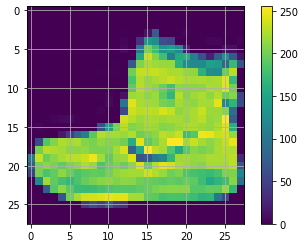

In [ ]:
plt.imshow(train_images[0])
plt.colorbar() # 픽셀 값 범위를 알 수 있음
plt.grid(True)
plt.show()

In [ ]:
train_images.dtype

dtype('uint8')

# 정규화


In [ ]:
train_images = train_images.astype(np.float64)
test_images = test_images.astype(np.float64)

In [ ]:
print(np.max(train_images[0]), np.min(train_images[0]))

255.0 0.0




일반적으로 0-1사의의 값을 가지게 하기 위해서는 다음 수식을 사용합니다.

$$normalize(x) = \frac{x - 최소값}{최대값 - 최소값}$$

이 경우 최소값이 0이기 떄문에 다음과 같이 간편하게 구할 수 있습니다.

$$normalize(x) = \frac{x}{최대값}$$

In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
train_5 = train_images[0:5]
train_5.shape

(5, 28, 28)

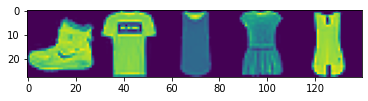

In [ ]:
# np.hstack은 height 방향의 배열을 풀어서 width 방향으로 연결해줍니다.

a = np.hstack(train_5)
plt.imshow(a)
plt.show()

#Data augmentation

In [ ]:
# Data augmentation
# 가우시안 노이즈 함수를 이용 평균 0.5, 표준편차 0.1 사이즈 28, 28

train_noisy_images = train_images +  np.random.normal(0.5, 0.1, (28, 28))
train_noisy_images[train_noisy_images>1] = 1.0

test_noisy_images = test_images + np.random.normal(0.5, 0.1, (28, 28))
test_noisy_images[test_noisy_images > 1] = 1.0

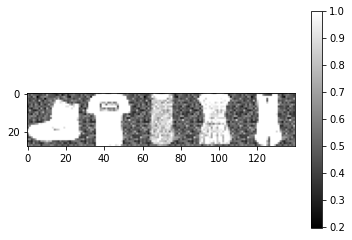

In [ ]:
plt.imshow(train_noisy_images[:5].transpose( (1, 0, 2) ).reshape(28, -1), cmap="gray")
plt.colorbar()
plt.show()

In [ ]:
print(test_labels)

[9 2 1 ... 8 1 5]


In [ ]:
# utils에는 좋은 기능이 많음, 링크에서 파일 다운받기(get_file), 정규화 등
from keras.utils.np_utils import to_categorical

train_labels = to_categorical(train_labels, 10)# 원 핫 인코딩으로 바꿔줌
test_labels = to_categorical(test_labels, 10)

print(train_labels.shape)

(60000, 10)


# 모델링

In [ ]:
# 함수형 Api

from keras.models import Model

input = keras.layers.Input(shape=(28, 28, 1))# HWC
x1 = Conv2D(32, (3, 3), activation= 'relu')(input)# 32는 출력 갯수
x2 = MaxPooling2D((2, 2))(x1)
x3 = Conv2D(64, (3, 3), activation= 'relu')(x2)
x4 = Flatten()(x3)
x5 = Dense(64, activation='relu')(x4)
x6 = Dense(10, activation='softmax')(x5)

model = Model(input, x6)

In [ ]:
model.summary()

# sequential model 은 인풋이 없다.

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
flatten_2 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                495680    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650 

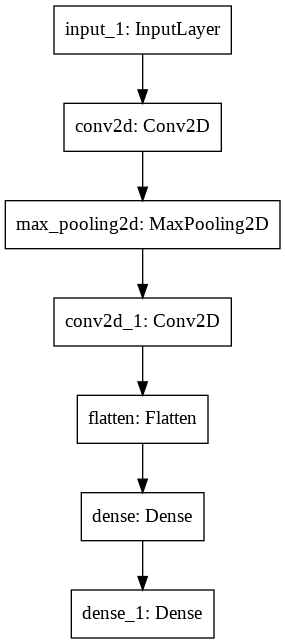

In [ ]:
keras.utils.plot_model(model, "my_first_model.png")

In [ ]:
# Sequential을 사용해서

model2 = keras.Sequential([
                           Conv2D(32, (3, 3), activation= 'relu', input_shape=(28, 28, 1)),
                           MaxPooling2D((2, 2)),
                           Conv2D(64, (3, 3), activation= 'relu'),
                           Flatten(),
                           Dense(64, activation='relu'),
                           Dense(10, activation='softmax')

])

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
flatten_5 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                495680    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 515,146
Trainable params: 515,146
Non-trainable params: 0
________________________________________________

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics= 'accuracy')

In [ ]:
hist = model.fit(train_noisy_images, train_labels, validation_data=(test_noisy_images, test_labels), epochs=5, verbose=2)
# hist로 값을 받으면 그래프 그리기가 편함
# 인풋 레이어가 있냐 없냐 차이로 정확도 차이가 남 있으면 잘 됨

Epoch 1/5
1875/1875 - 5s - loss: 0.5118 - accuracy: 0.8142 - val_loss: 0.4434 - val_accuracy: 0.8299
Epoch 2/5
1875/1875 - 5s - loss: 0.3444 - accuracy: 0.8751 - val_loss: 0.3946 - val_accuracy: 0.8519
Epoch 3/5
1875/1875 - 5s - loss: 0.2986 - accuracy: 0.8887 - val_loss: 0.3756 - val_accuracy: 0.8566
Epoch 4/5
1875/1875 - 5s - loss: 0.2700 - accuracy: 0.8982 - val_loss: 0.3694 - val_accuracy: 0.8613
Epoch 5/5
1875/1875 - 4s - loss: 0.2458 - accuracy: 0.9081 - val_loss: 0.3590 - val_accuracy: 0.8662


In [ ]:
# 딕셔너리 형태로 진행 사항이 저장됨
hist.history

{'accuracy': [0.8142333626747131,
  0.8751166462898254,
  0.8886500000953674,
  0.8981666564941406,
  0.9080833196640015],
 'loss': [0.5118066072463989,
  0.34437665343284607,
  0.29864901304244995,
  0.26998576521873474,
  0.24579066038131714],
 'val_accuracy': [0.8299000263214111,
  0.8518999814987183,
  0.8565999865531921,
  0.861299991607666,
  0.8661999702453613],
 'val_loss': [0.4433618187904358,
  0.39461225271224976,
  0.37555575370788574,
  0.3693578839302063,
  0.35903871059417725]}

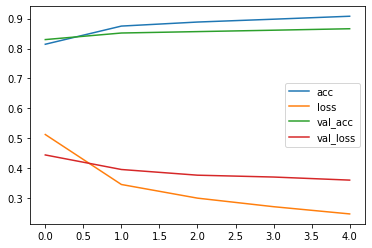

In [ ]:
plt.plot(hist.history['accuracy'], label = 'acc')
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_accuracy'], label = 'val_acc')
plt.plot(hist.history['val_loss'], label = 'val_loss')

plt.legend(loc = 'under letf')

plt.show()

In [ ]:
res = model.predict(test_images[0].reshape(1, 28, 28))

np.argmax(res)
# 테스트 이미지 인식

9

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


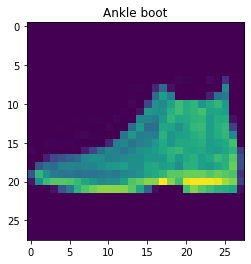

In [ ]:
plt.imshow(test_images[0])
plt.title(class_names[9])

print(test_labels[0])# 9 번째


In [ ]:
# 모델 저장
!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


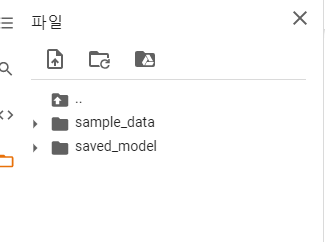

## keras에 존재하는 전처리와 data augmentation

In [ ]:
resize_and_rescale  = keras.Sequential([
  keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE), # 크기 조정
  keras.layers.experimental.preprocessing.Rescaling(1./255) # 픽셀 배율 조정
])

resize_and_rescale('원하는 이미지를 넣으면 크기, 픽셀 배율이 조정됨')

In [ ]:
data_augmentation = tf.keras.Sequential([
  keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

data_augmentation('위와 마찬가지')

- 사용 방법

In [ ]:

model3 = tf.keras.Sequential([
  resize_and_rescale,
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
])



In [ ]:
# 또는
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range = 10, horizontal_flip = True, zoom_range = 0.1)

# 다음과 같이 data augmentation을 실행

- 케라스를 사용하면서 사용해본적이 없는 기능
- 직접 함수로 만들어서 사용한 경우가 많은거 같음

자세한 내용은

https://www.tensorflow.org/tutorials/images/data_augmentation?hl=ko

# 다른 방법

In [ ]:
type(train_noisy_images)
# 이전 방법에서는 넘파이 데이터를 사용했는데 이번에는 텐서로 바꿔서 사용해보자

numpy.ndarray

## fashion mnist

In [ ]:
train_images, test_images = train_images/255.0, test_images/255.0

x_train = train_images[..., tf.newaxis].astype('float32') #  Conv2D에서 인풋 사이즈 (28, 28, 1)로 설정하면 안해도 됨
x_test = test_images[..., tf.newaxis].astype('float32') # float64일 때는 안됬음


In [ ]:
print(np.max(train_images[0]))

1.0


# 데이터 셋 만들기

In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

In [ ]:
# 이전 데이터를 tf.data를 사용해서 섞고 배치를 만듭니다.
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, train_labels)).shuffle(10000).batch(32)# 10000 단위로 셔플

test_ds = tf.data.Dataset.from_tensor_slices((x_test, test_labels)).batch(32)

In [ ]:
print(type(test_ds))

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


# 모델링

케라스(Keras)의 모델 서브클래싱(subclassing) API를 사용하여 tf.keras 모델을 만듭니다:

In [ ]:
class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1 = Conv2D(32, (3, 3), activation='relu')
    self.max = MaxPooling2D((2, 2))
    self.conv2 = Conv2D(64, (3, 3), activation= 'relu')
    self.flatten = Flatten()
    self.d1 = Dense(64, activation='relu')
    self.d2 = Dense(10, activation= 'softmax')

  def call(self, x):
    x = self.conv1(x)
    x = self.max(x)
    x = self.conv2(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

# Create an instance of the model
model = MyModel()
model.build(input_shape=(None, 28, 28, 1))
model.summary()

Model: "my_model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           multiple                  320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling multiple                  0         
_________________________________________________________________
conv2d_35 (Conv2D)           multiple                  18496     
_________________________________________________________________
flatten_12 (Flatten)         multiple                  0         
_________________________________________________________________
dense_24 (Dense)             multiple                  495680    
_________________________________________________________________
dense_25 (Dense)             multiple                  650       
Total params: 515,146
Trainable params: 515,146
Non-trainable params: 0
_________________________________________________

훈련에 필요한 옵티마이저(optimizer)와 손실 함수를 선택합니다:

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)# 소프트 맥스를 지날 때 면 True
#텐서플로우에서는 softmax 함수를 거칠 때, from_logits = True를 사용하는게 numerical stable하다고 설명하고 있습니다.

optimizer = tf.keras.optimizers.Adam()

모델의 손실과 성능을 측정할 지표를 선택합니다. 에포크가 진행되는 동안 수집된 측정 지표를 바탕으로 최종 결과를 출력합니다.

In [ ]:
train_loss = tf.keras.metrics.Mean(name='train_loss') # 평균을 내도록, 이름은 train_loss
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

tf.GradientTape를 사용하여 모델을 훈련합니다:

- 1.x 버전과 다르게 2.x 버전은 즉시 실행이 됩니다.

- 즉시 실행은 편리하지만 성능과 전개성을 저하시킵니다.

- 원래 처럼 그래프를 만들고 실행하는 define and run 형태로 사용 가능!

In [ ]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(images, training=True) # True면 드롭아웃 같은 것이 적용, 아니면 적용이 안됨
    loss = loss_object(labels, predictions)# 손실계산
  gradients = tape.gradient(loss, model.trainable_variables)# 기울기 계산, 자동 미분
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))# 가중치 업데이트

  train_loss(loss)# 훈련할 때 보여주기 위한 지표
  train_accuracy(labels, predictions)

이제 모델을 테스트합니다:

In [ ]:
@tf.function
def test_step(images, labels):
    
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [ ]:
EPOCHS = 5

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  print(
    f'Epoch {epoch + 1}, '
    f'Loss: {train_loss.result()}, '
    f'Accuracy: {train_accuracy.result() * 100}, '
    f'Test Loss: {test_loss.result()}, '
    f'Test Accuracy: {test_accuracy.result() * 100}'
  )

Epoch 1, Loss: 0.06306898593902588, Accuracy: 97.81999969482422, Test Loss: 0.5275934338569641, Test Accuracy: 87.55000305175781
Epoch 2, Loss: 0.04184102267026901, Accuracy: 98.60166931152344, Test Loss: 0.601047158241272, Test Accuracy: 87.68000030517578
Epoch 3, Loss: 0.026498090475797653, Accuracy: 99.14500427246094, Test Loss: 0.6510053873062134, Test Accuracy: 87.52999877929688
Epoch 4, Loss: 0.018350854516029358, Accuracy: 99.43666076660156, Test Loss: 0.7491151094436646, Test Accuracy: 87.81999969482422
Epoch 5, Loss: 0.013423419557511806, Accuracy: 99.59166717529297, Test Loss: 0.7812321186065674, Test Accuracy: 87.80999755859375


기존 텐서플로우는 굉장히 복잡한 난이도를 가지고 있었고 진입 장벽이 매우 높았습니다. 그러한 문제를 해결하기 위해서 케라스가 개발되었습니다. 케라스는 매우 쉬운 문법으로 입문하기 좋지만 이미 구현된 기능만 사용할 수 있습니다. 새로운 방식을 만들어서 사용할려면 텐서플로를 사용하는 것이 좋습니다. 



Tensorflow는

- Threading이나 Queue 등의 메커니즘을 훨씬 디테일하게 사용할 수 있고 내부 구조를 확인할 수 있는 디버거를 사용할 수 있어 연구 개발을 할려면 Tensorflow를 사용하는 것이 더 좋다